In [4]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
sns.set_style("ticks", {'axes.grid': False})

In [5]:
# Load data
src_data_file = '../data/data.csv'
data = pd.read_csv(src_data_file, na_values='\\N')

12.10000038 39.79999924
['12-19', '19-25', '26-32', '33-39']


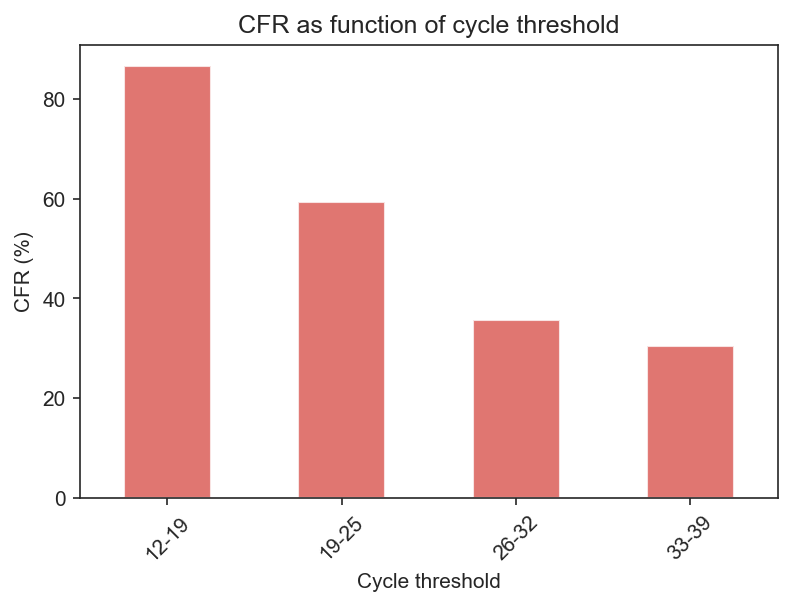

In [6]:
var = 'cycletime'
num_bins = 5
minc = data[var].min()
maxc = data[var].max()
print(minc, maxc)

bins = np.linspace(minc, maxc, num=num_bins)
bin_names = []
for i in range(0, len(bins) - 1):
    bin_names += [str(int(round(bins[i]))) + "-" + str(int((bins[i + 1])))]
print(bin_names)
    
data1 = data.copy()
binned = pd.cut(data[var], bins)
data2 = pd.DataFrame()
data2['Disposition'] = data1['Disposition']
data2['CT group'] = binned
data2.dropna(inplace=True)

# Count number of total, diseased, and recovered patients
tot = pd.value_counts(data2['CT group'], sort=False)
died = pd.value_counts(data2[data2['Disposition'] == 1]['CT group'])
rec = pd.value_counts(data2[data2['Disposition'] == 0]['CT group'])

# CFR in %
cfr = 100 * died / tot
data3 = pd.DataFrame()
data3['CFR'] = cfr
data3['Count'] = tot

# Combine plots
fig = plt.figure()
ax1 = data3.CFR.plot(kind='bar', color=sns.xkcd_rgb["pale red"], legend=False, width=0.5, alpha=0.8)
# ax2 = data3.Count.plot(kind='line', secondary_y=True, legend=True)
ax1.set_xlabel('Cycle threshold')
ax1.set_ylabel('CFR (%)')
# ax2.set_ylabel('Total count')
ax1.set_xticklabels(bin_names, rotation=45)
plt.title('CFR as function of cycle threshold')
fig.savefig('cfr_ct.pdf', bbox_inches='tight')